In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset loading

In [2]:
dataset = pd.read_csv('../Y3 - Sample data/Z2 - datasetprepclean.csv', index_col = 0,
                     )
print('dataset shape:', dataset.shape)
dataset.head()

dataset shape: (4768, 278)


,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bend_edge_angle_min_09,bend_edge_angle_max_09,bend_edge_length_mean_09,bend_edge_length_std_09,bend_edge_length_min_09,bend_edge_length_max_09,VAMAT,VALAJOUT,VALTOT,bend_group
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.51,5.15,17.66,3-5
L1600470,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.92,1.17,0
L1600700,625.429871,2,0,10823.929688,12759.00000,255.179993,50.000000,11152.315430,11152.315430,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1.61,2.36,1-2
L1600710,625.429871,2,0,10823.929688,12759.00000,255.179993,50.000000,11152.315430,11152.315430,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1.61,2.36,1-2
L1605790,2535.909668,5,0,184134.328125,355747.34375,826.389404,430.483917,230244.703125,184672.265625,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.24,5.72,17.96,3-5


In [3]:
dataset.columns.values

array(['cut_length', 'num_closed_patterns', 'num_open_patterns',
       'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
       'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',
       'thickness', 'radius_approx', 'radius_count', 'direction_count',
       'bend_count', 'bend_radius_00', 'bend_angle_00',
       'bend_direction_00', 'deformation_length_00', 'merged_bend_00',
       'punch_length_00', 'bend_radius_01', 'bend_angle_01',
       'bend_direction_01', 'deformation_length_01', 'merged_bend_01',
       'punch_length_01', 'bend_radius_02', 'bend_angle_02',
       'bend_direction_02', 'deformation_length_02', 'merged_bend_02',
       'punch_length_02', 'bend_radius_03', 'bend_angle_03',
       'bend_direction_03', 'deformation_length_03', 'merged_bend_03',
       'punch_length_03', 'bend_radius_04', 'bend_angle_04',
       'bend_direction_04', 'deformation_length_04', 'merged_bend_04',
       'punch_length_04', 'bend_radius_05', 'bend_angle_05',
     

In [4]:
for index, nancount in dataset.isnull().sum().iteritems():
    if nancount != 0:
        print(index, '-->', nancount)
else:
    print('Done !')

deformation_length_00 --> 239
deformation_length_01 --> 107
deformation_length_02 --> 8
deformation_length_03 --> 3
deformation_length_04 --> 1
Done !


In [5]:
#Cleaning of the remaining Nan
#dataset = dataset.fillna(0)
dataset = dataset.dropna()
dataset.shape

(4501, 278)

# cleaning to have at least min occurences

In [6]:
minocc = 50
todrop = []
df = dataset['thickness'].reset_index().groupby('thickness').count()
for index, occ in df.iterrows():
    if occ.COART <= minocc:
        todrop.append(index)
        print(index, 'will be dropped')

for thickness in todrop:
    dataset = dataset[dataset['thickness'] != thickness]

1.0 will be dropped
1.5 will be dropped
2.0 will be dropped
20.0 will be dropped


# Dataset re-ordering and Splitting

In [7]:
start = dataset.columns.values
todrop = ['bend_group', 'VAMAT', 'VALAJOUT', 'VALTOT']
tokeep = [x for x in start if x not in todrop ]
tokeep

['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'thickness',
 'radius_approx',
 'radius_count',
 'direction_count',
 'bend_count',
 'bend_radius_00',
 'bend_angle_00',
 'bend_direction_00',
 'deformation_length_00',
 'merged_bend_00',
 'punch_length_00',
 'bend_radius_01',
 'bend_angle_01',
 'bend_direction_01',
 'deformation_length_01',
 'merged_bend_01',
 'punch_length_01',
 'bend_radius_02',
 'bend_angle_02',
 'bend_direction_02',
 'deformation_length_02',
 'merged_bend_02',
 'punch_length_02',
 'bend_radius_03',
 'bend_angle_03',
 'bend_direction_03',
 'deformation_length_03',
 'merged_bend_03',
 'punch_length_03',
 'bend_radius_04',
 'bend_angle_04',
 'bend_direction_04',
 'deformation_length_04',
 'merged_bend_04',
 'punch_length_04',
 'bend_radius_05',
 'bend_angle_05',
 'bend_direction_05',
 'deformation_length_05',
 'merged_bend_05

In [8]:
#Dataset definition
X = dataset[tokeep]
y = dataset['VALTOT']

In [9]:
# Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0 ,stratify=dataset['bend_group'])

#ONLY FOR DATASET CLEANING PURPOSE
#X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.5, random_state=0 ,stratify=dataset['bend_group'])

# Blocs creation

In [10]:
#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
# Metric
from sklearn.metrics import mean_squared_error

In [12]:
#regressions
import lightgbm as lgb

gbm = lgb.LGBMRegressor(objective='regression',
                        learning_rate=0.05,
                        n_estimators=400,
                        min_child_samples=10,
                        random_state=0,
                        max_depth=500,
                       # eval_metric='mean_squared_error',
                       )

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [14]:
pipe = [('scaler', scaler), ('gbm', gbm)]
regpip = Pipeline(pipe)

In [15]:
regpip.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gbm', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.05, max_depth=500, min_child_samples=10,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=400,
       n_jobs=-1, num_leaves=31, objective='regression', random_state=0,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1))])

In [16]:
param_grid = {
    #'gbm__learning_rate': [0.05, 0.1, ],
    #'gbm__n_estimators': [300, 400, 500],
    'gbm__min_child_samples' : [15,10,5],
    #'gbm__lambda_l1': np.logspace(-3,3,4),
    #'gbm__lambda_l2': np.logspace(-3,3,4),
    #'gbm__max_bin':[200, 150],
    #'gbm__num_leaves':[20,25],
    #'gbm__max_depth':[500,750],
    #'gbm__min_split_gain':[0,.1]
}

gridgbm = GridSearchCV(regpip, param_grid, cv=3, n_jobs=-2, scoring='neg_mean_squared_error', verbose=5)

In [17]:
gridgbm.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] gbm__min_child_samples=15 .......................................
[CV] gbm__min_child_samples=15 .......................................
[CV] gbm__min_child_samples=15 .......................................
[CV]  gbm__min_child_samples=15, score=-4.370277464589972, total=   5.4s
[CV] gbm__min_child_samples=10 .......................................
[CV]  gbm__min_child_samples=15, score=-5.510206045136462, total=   6.7s
[CV] gbm__min_child_samples=10 .......................................
[CV]  gbm__min_child_samples=15, score=-4.824320476654782, total=   6.7s
[CV] gbm__min_child_samples=10 .......................................
[CV]  gbm__min_child_samples=10, score=-4.588133923693801, total=   5.8s
[CV] gbm__min_child_samples=5 ........................................
[CV]  gbm__min_child_samples=10, score=-4.419451594862206, total=   7.5s
[CV] gbm__min_child_samples=5 ........................................
[CV]  gb

[Parallel(n_jobs=-2)]: Done   6 out of   9 | elapsed:   15.3s remaining:    7.7s


[CV]  gbm__min_child_samples=5, score=-5.010427400263555, total=   8.5s
[CV]  gbm__min_child_samples=5, score=-4.789141406127392, total=   6.7s
[CV]  gbm__min_child_samples=5, score=-4.2889912838004935, total=   8.8s


[Parallel(n_jobs=-2)]: Done   9 out of   9 | elapsed:   22.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gbm', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.05, max_depth=500, min_child_samples=10,
       min_child_weight=0.001, min_sp...0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1))]),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'gbm__min_child_samples': [15, 10, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=5)

In [18]:
gridgbm.best_params_

{'gbm__min_child_samples': 10}

In [19]:
gridgbm.best_score_

-4.452295821966188

In [20]:
mean_squared_error(y_test, gridgbm.predict(X_test))

4.862899848279314

In [21]:
mean_squared_error(y_train, gridgbm.predict(X_train))

0.36345258184174606

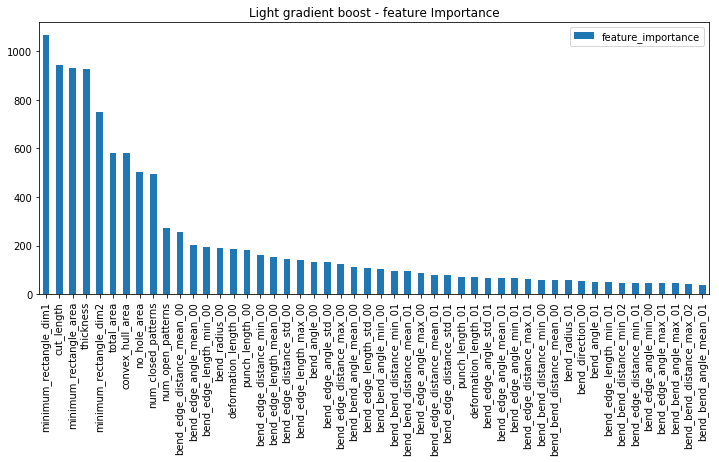

In [22]:
featimp = list(gridgbm.best_estimator_.named_steps['gbm'].feature_importances_)
df = pd.DataFrame({'feature_importance':featimp}, index =X_test.columns.values)
df = df.sort_values('feature_importance', ascending=False)
df[:50].plot.bar(figsize=(12,5))
plt.title('Light gradient boost - feature Importance')
plt.show()

In [23]:
gridgbm.best_estimator_.named_steps['gbm']

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.05, max_depth=500, min_child_samples=10,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=400,
       n_jobs=-1, num_leaves=31, objective='regression', random_state=0,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

# Solution comparison

In [24]:
prediction_lgbm = gridgbm.predict(X_test)

In [25]:
resultset = pd.DataFrame({'True': y_test,
                          'pred_lgbm':prediction_lgbm,
                            }, index=y_test.index)
resultset.head()

,True,pred_lgbm
COART,,
L2507240,4.33,4.028943
L2605990,30.11,29.792837
L3048040,8.04,7.437188
L8038340,3.38,3.580805
L8828360,1.59,2.000012


In [26]:
mean_squared_error(resultset['True'], resultset['pred_lgbm'])

4.862899848279314

In [27]:
resultset['RMSE_lgbm'] = (resultset['True']-resultset['pred_lgbm'])**2
resultset.head()

,True,pred_lgbm,RMSE_lgbm
COART,,,
L2507240,4.33,4.028943,0.090635
L2605990,30.11,29.792837,0.100592
L3048040,8.04,7.437188,0.363383
L8038340,3.38,3.580805,0.040323
L8828360,1.59,2.000012,0.168110


In [28]:
#
comparisonset = pd.merge(resultset.reset_index(), X_test.reset_index(), on='COART', how='inner')
comparisonset.head()

,COART,True,pred_lgbm,RMSE_lgbm,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,...,bend_edge_distance_min_09,bend_edge_distance_max_09,bend_edge_angle_mean_09,bend_edge_angle_std_09,bend_edge_angle_min_09,bend_edge_angle_max_09,bend_edge_length_mean_09,bend_edge_length_std_09,bend_edge_length_min_09,bend_edge_length_max_09
0,L2507240,4.33,4.028943,0.090635,831.576904,1,0,32598.949219,32800.898438,328.009003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,L2605990,30.11,29.792837,0.100592,2985.817627,5,0,299138.312500,400558.625000,769.817993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,L3048040,8.04,7.437188,0.363383,1387.289307,3,0,49304.828125,82270.414062,422.843750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,L8038340,3.38,3.580805,0.040323,978.483765,6,0,22766.531250,24131.550781,321.753998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,L8828360,1.59,2.000012,0.168110,692.500916,7,0,4417.547363,8039.794434,115.647423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


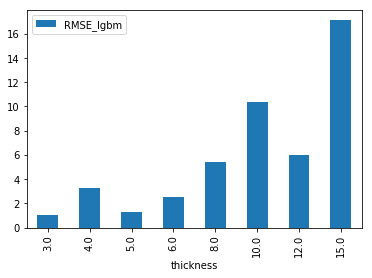

,RMSE_lgbm
thickness,
3.0,1.008650
4.0,3.236670
5.0,1.282246
6.0,2.537429
8.0,5.406802
10.0,10.364396
12.0,5.990625
15.0,17.096422


In [29]:
# Is the error sourced by thickness ?
df = comparisonset[['RMSE_lgbm', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.show()
df

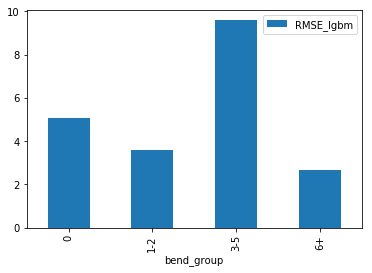

,RMSE_lgbm
bend_group,
0,5.058475
1-2,3.587914
3-5,9.575877
6+,2.660977


In [30]:
# Is the error sourced by number of errors ?
def bendgroupcalc(entry):
    if entry == 0:
        return '0'
    elif entry <= 2:
        return '1-2'
    elif entry <= 5:
        return '3-5'
    else:
        return '6+'
    return 'None'

comparisonset['bend_group'] = comparisonset['bend_count'].apply(bendgroupcalc)

df = comparisonset[['RMSE_lgbm', 'bend_group']].groupby('bend_group').mean()
df.plot.bar()
plt.show()
df

In [31]:
comparisonset['percent_error'] = ((comparisonset['True'] / comparisonset['pred_lgbm'])-1)*100
comparisonset[['True', 'pred_lgbm', 'percent_error']].head()

,True,pred_lgbm,percent_error
0,4.33,4.028943,7.472363
1,30.11,29.792837,1.064560
2,8.04,7.437188,8.105379
3,3.38,3.580805,-5.607825
4,1.59,2.000012,-20.500483


In [32]:
df = comparisonset[['RMSE_lgbm', 'percent_error', 'thickness', 'bend_group', 'COART']].groupby(['thickness', 'bend_group'])#.mean()
df.agg({'RMSE_lgbm': ['mean', 'max'], 'percent_error': ['mean', 'max'],'COART':['count'] })

RMSE_lgbm             percent_error              COART
                           mean         max          mean          max count
thickness bend_group                                                        
3.0       0            0.054222    0.169247     -2.914213    18.707468     7
          1-2          1.533060    7.890344     -1.309708    24.004619    13
          3-5          1.092997    3.714788      6.426912    44.060084     7
          6+           0.281874    0.281874      6.459577     6.459577     1
4.0       0            1.974649   30.071128      5.404249    60.406552    35
          1-2          2.840813  162.223812     -4.172463    38.594614   114
          3-5          5.313376   50.815632     -4.288527    21.444445    43
5.0       0            0.498957    3.932336     -2.035348    70.723202    59
          1-2          1.601370   72.694718      0.292381    46.560535    92
          3-5          1.553173   21.222514     -2.398379    25.092254    29
          6+           4.281528   11.429384     -3.864850     9.896837     3
6.0       0            2.016922   62.050192     -0.707507   201.427377   145
          1-2          2.971670  223.846673     -2.155884    80.957782   174
          3-5          2.653643   27.379744     -6.841615    36.061809    29
          6+           2.043901    6.316294     -5.823386     0.620529     7
8.0       0            4.377330  162.717254      9.128516  1337.208339   136
          1-2          5.257873  141.326091      1.396119   195.384628   114
          3-5         11.985756   86.773188     -3.904152    48.908979    24
          6+           4.497962    4.497962     22.140144    22.140144     1
10.0      0            6.770546  221.196002      5.089332   155.128105    95
          1-2          6.585237  245.862703      2.743252   140.000207    71
          3-5         86.581393  328.812285     15.633215    52.671675     8
12.0      0            6.381454  100.047976     -2.798532   344.673631    54
          1-2          4.263043   32.392004     -6.011390    24.035074    19
          3-5         11.850268   18.944961    -15.876067    -7.206463     2
15.0      0           18.742105  576.383876     -4.844007    52.103490    52
          1-2          0.052581    0.121157     -0.626328     2.253244     4
          3-5          8.396345   16.667220     11.200316    20.569649     2

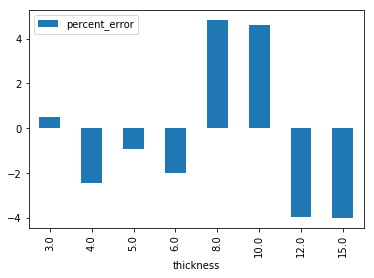

,percent_error
thickness,
3.0,0.500795
4.0,-2.452701
5.0,-0.952645
6.0,-2.019388
8.0,4.833005
10.0,4.616800
12.0,-3.961190
15.0,-3.999880


In [33]:
df = comparisonset[['percent_error', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.show()
df

In [34]:
df = comparisonset[['COART', 'thickness']]
df.groupby('thickness').count()

,COART
thickness,
3.0,28
4.0,192
5.0,183
6.0,355
8.0,275
10.0,174
12.0,75
15.0,58


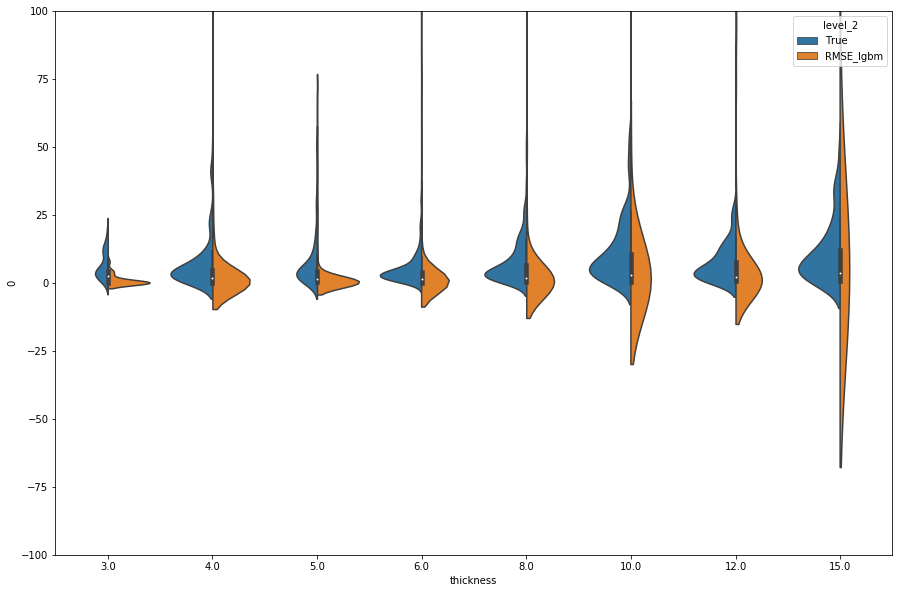

In [35]:
df=comparisonset[['True', 'RMSE_lgbm', 'COART', 'thickness']]
#df=df[df['thickness']!=15]
df.set_index(['COART', 'thickness'], inplace=True)
df = df.stack().reset_index()
fig, ax = plt.subplots(figsize=(15,10))
ax.set_ylim(-100, 100)
sns.violinplot(x="thickness", y=0, data=df, split=True, hue='level_2', ax=ax)

plt.show()

In [36]:
df = comparisonset[['percent_error', 'COART', 'thickness']]
df.set_index('COART', inplace=True)
worst = df.groupby('thickness')['percent_error'].nlargest(3)
worst
worst.to_csv('worst_s1.csv')